In [185]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from datetime import datetime
# from datetime import timedelta
# from pandas.plotting import register_matplotlib_converters
# from statsmodels.tsa.stattools import acf, pacf
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# register_matplotlib_converters()
# from time import time

# Catfish Sales Data

In [125]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [187]:
# def parser(s):
#     return datetime.strptime(s, '%Y-%m-%d')

In [1]:
# import pandas as pd
import pandas as pd


#read data
dataset = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, squeeze=True)

# printing 
dataset.head()

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
Name: Total, dtype: int64

In [2]:
dataset.describe()

count      324.000000
mean     19643.984568
std       5039.324331
min       8196.000000
25%      15764.000000
50%      19660.500000
75%      23604.500000
max      30485.000000
Name: Total, dtype: float64

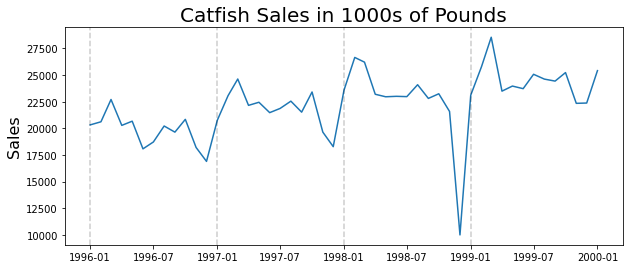

In [189]:
# importing module
import matplotlib.pyplot as plt

#infer the frequency of the data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

# starting and ending date for the dataset
start_date = datetime(1996,1,1)
end_date = datetime(2000,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]

# ploting visualized graph of the dataset
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)

# for loop to iterate through each year
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [190]:
# #At December 1 1998
# lim_catfish_sales[datetime(1998,12,1)] = 10000

In [191]:
# plt.figure(figsize=(10,4))
# plt.plot(lim_catfish_sales)
# plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
# plt.ylabel('Sales', fontsize=16)
# for year in range(start_date.year,end_date.year):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Remove the trend

In [192]:
# first_diff = lim_catfish_sales.diff()[1:]

In [193]:
# plt.figure(figsize=(10,4))
# plt.plot(first_diff)
# plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
# plt.ylabel('Sales', fontsize=16)
# for year in range(start_date.year,end_date.year):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
# plt.axhline(0, color='k', linestyle='--', alpha=0.2)

# Get training and testing sets

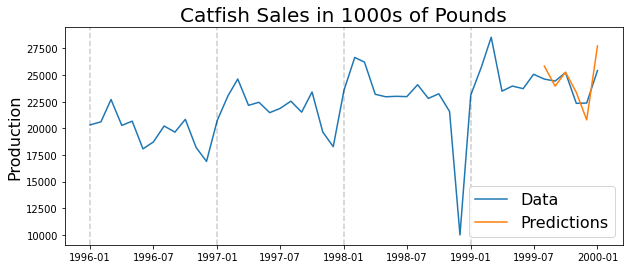

In [194]:
# starting and ending date for the dataset
start_date = datetime(1996,1,1)
end_date = datetime(2000,1,1)

# training and testing data
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

# testing 
test_data = lim_catfish_sales[train_end + timedelta(days=1):test_end]

# graph size 
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)

# creatig lagends
plt.legend(('Data', 'Predictions'), fontsize=16)

# setting the titles
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)

# for loop to iterate
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# Make Predictions

In [195]:
# my_order = (0,1,0)
# my_seasonal_order = (1, 0, 1, 12)

In [196]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = lim_catfish_sales[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

/home/uca/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/uca/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/uca/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/uca/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/uca/.local/lib/python3.8

In [201]:
rolling_residuals = test_data - rolling_predictions

In [198]:
# plt.figure(figsize=(10,4))
# plt.plot(rolling_residuals)
# plt.axhline(0, linestyle='--', color='k')
# plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
# plt.ylabel('Error', fontsize=16)

In [199]:
# plt.figure(figsize=(10,4))

# plt.plot(lim_catfish_sales)
# plt.plot(rolling_predictions)

# plt.legend(('Data', 'Predictions'), fontsize=16)

# plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
# plt.ylabel('Production', fontsize=16)
# for year in range(start_date.year,end_date.year):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [202]:
# printing the MAPE and RMSE
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Mean Absolute Percent Error: 0.0897
Root Mean Squared Error: 3119.1661011665706


# Detecting the Anomaly

## Attempt 1: Deviation Method

In [203]:
# plt.figure(figsize=(10,4))
# plt.plot(lim_catfish_sales)
# plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
# plt.ylabel('Sales', fontsize=16)
# for year in range(start_date.year,end_date.year):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [204]:
# rolling_deviations = pd.Series(dtype=float, index = lim_catfish_sales.index)

In [205]:
# for date in rolling_deviations.index:
#     #get the window ending at this data point
#     window = lim_catfish_sales.loc[:date]
    
#     #get the deviation within this window
#     rolling_deviations.loc[date] = window.std()

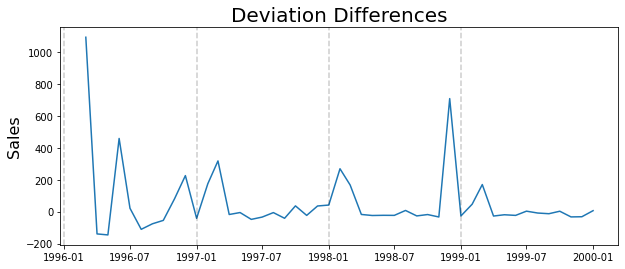

In [206]:
#get the difference in deviation between one time point and the next
diff_rolling_deviations = rolling_deviations.diff()
diff_rolling_deviations = diff_rolling_deviations.dropna()

# ploting the deviation 
plt.figure(figsize=(10,4))
plt.plot(diff_rolling_deviations)

# setting titles
plt.title('Deviation Differences', fontsize=20)
plt.ylabel('Sales', fontsize=16)

# for loop to iterate
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Attempt 2: Seasonal Method

Text(0, 0.5, 'Sales')

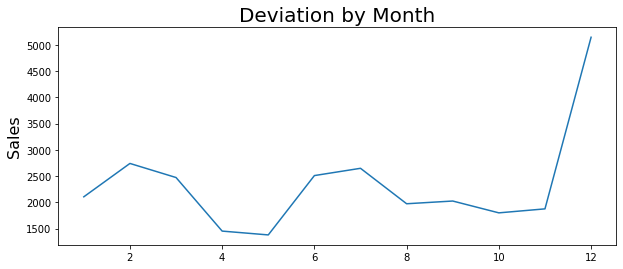

In [207]:
# applying seasonal method
month_deviations = lim_catfish_sales.groupby(lambda d: d.month).std()

# ploting the graph
plt.figure(figsize=(10,4))
plt.plot(month_deviations)
plt.title('Deviation by Month', fontsize=20)
plt.ylabel('Sales', fontsize=16)

## So, the anomaly occurs in a December

In [208]:
december_data

Date
1996-12-01    16898
1997-12-01    18278
1998-12-01    10000
1999-12-01    22372
Name: Total, dtype: int64

In [209]:
# anomaly accurs in december
december_data = lim_catfish_sales[lim_catfish_sales.index.month == 12]
min_dev = 9999999
curr_anomaly = None

# using for loop to iterate
for date in december_data.index:
    other_data = december_data[december_data.index != date]
    curr_dev = other_data.std()
    if curr_dev < min_dev:
        min_dev = curr_dev
        curr_anomaly = date
print(curr_anomaly)

1998-12-01 00:00:00


In [210]:
curr_anomaly

Timestamp('1998-12-01 00:00:00')

# What to do about the anomaly?


## Simple Idea: use mean of other months

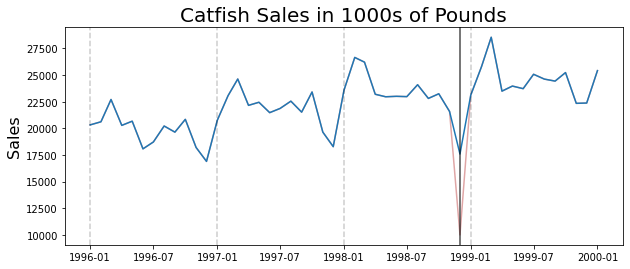

In [211]:
# copying the dataset
adjusted_data = lim_catfish_sales.copy()

# taking mean
adjusted_data.loc[curr_anomaly] = december_data[(december_data.index != curr_anomaly) & (december_data.index < test_data.index[0])].mean()

# ploting the graph of mean one
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales, color='firebrick', alpha=0.4)
plt.plot(adjusted_data)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)

# for loop to iterate
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axvline(curr_anomaly, color='k', alpha=0.7)

# Resulting Predictions

In [212]:
# plt.figure(figsize=(10,4))
# plt.plot(rolling_residuals)
# plt.axhline(0, linestyle='--', color='k')
# plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
# plt.ylabel('Error', fontsize=16)

/home/uca/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/uca/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/uca/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/uca/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/uca/.local/lib/python3.8

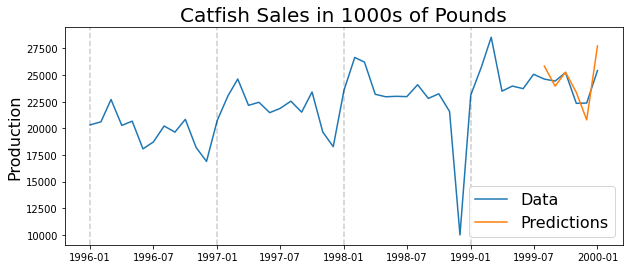

In [213]:
# starting and ending dataset
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)
rolling_residuals = test_data - rolling_predictions

# testing dataset
test_data = adjusted_data[train_end + timedelta(days=1):test_end]
rolling_predictions = test_data.copy()

# for loop to train
for train_end in test_data.index:
    train_data = adjusted_data[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred
    
# ploting the graph
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)

# for loop
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [184]:
# perfromance evaluation
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Mean Absolute Percent Error: 0.0464
Root Mean Squared Error: 1331.136048782351


In [34]:
import pandas as pd
# importing the dataset
dataset = pd.read_csv("creditcard.csv")

# printing the columns
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


/home/uca/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


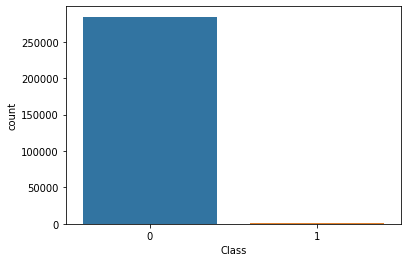

0    284315
1       492
Name: Class, dtype: int64


In [25]:
# import required module
import seaborn as sns
import matplotlib.pyplot as plt
# creating graph
sns.countplot(dataset.Class)

# showing the graph
plt.show()

# printing total values
print(dataset.Class.value_counts())

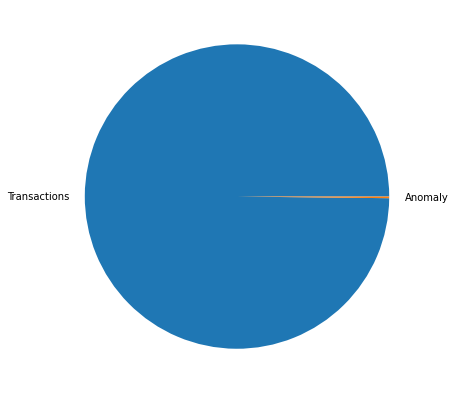

In [26]:
# importing required module
# import mathplotlib as plt

# creating variable
transaction = 0
fraud = 0

# for loop to iterate the dataset
for i in dataset["Class"]:
    if i == 0 :
        transaction +=1
    else:
        fraud+=1

# data for pie chart
data = [transaction, fraud]
label = ["Transactions", "Anomaly"]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = label)
 
# show plot
plt.show()

In [27]:

dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
import numpy as np
def ztest(feature):
    
    mean = normal[feature].mean()
    std = fraud[feature].std()
    zScore = (fraud[feature].mean() - mean) / (std/np.sqrt(sample_size))
    
    return zScore
# creating significant features
columns= dataset.drop('Class', axis=1).columns
normal= dataset[dataset.Class==0]
fraud= dataset[dataset.Class==1]
sample_size=len(fraud)
significant_features=[]
critical_value=2.58
significant_features=[]
for i in columns:
    
    z_vavlue=ztest(i)
    
    if( abs(z_vavlue) >= critical_value):    
        print(i," is statistically significant") #Reject Null hypothesis. i.e. H0
        significant_features.append(i)
dataset= dataset[significant_features]

# inliers
inliers = dataset[dataset.Class==0]
ins = inliers.drop(['Class'], axis=1)

# outliers
outliers = dataset[dataset.Class==1]
outs = outliers.drop(['Class'], axis=1)

# printing the shape
ins.shape, outs.shape


Time  is statistically significant
V1  is statistically significant
V2  is statistically significant
V3  is statistically significant
V4  is statistically significant
V5  is statistically significant
V6  is statistically significant
V7  is statistically significant
V9  is statistically significant
V10  is statistically significant
V11  is statistically significant
V12  is statistically significant
V14  is statistically significant
V16  is statistically significant
V17  is statistically significant
V18  is statistically significant
V19  is statistically significant
V20  is statistically significant
V21  is statistically significant
V24  is statistically significant
V27  is statistically significant
V28  is statistically significant
Amount  is statistically significant


AttributeError: 'DataFrame' object has no attribute 'Class'

In [9]:
def normal_accuracy(values):
    
    tp=list(values).count(1)
    total=values.shape[0]
    accuracy=np.round(tp/total,4)
    
    return accuracy

def fraud_accuracy(values):
    
    tn=list(values).count(-1)
    total=values.shape[0]
    accuracy=np.round(tn/total,4)
    
    return accuracy


In [11]:
from sklearn.ensemble import IsolationForest
state= 42

ISF = IsolationForest(random_state=state)
ISF.fit(ins)

normal_isf = ISF.predict(ins)
fraud_isf = ISF.predict(outs)

in_accuracy_isf=normal_accuracy(normal_isf)
out_accuracy_isf=fraud_accuracy(fraud_isf)
print("Accuracy in Detecting Normal Cases:", in_accuracy_isf)
print("Accuracy in Detecting Fraud Cases:", out_accuracy_isf)


ValueError: at least one array or dtype is required

In [17]:
dataset = [1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 8, 0,
           
           7, 6, 7, 8 ,7, 6, 6, 5, 6, 7, 4 ,5 ,6, 7, 8, 7, 6, 5, 9, 6, 7, 5, 6, 6, 6, 8]

sum = 0
for i in dataset:
    sum+=i

print("the mean is : ",sum/len(dataset))


the mean is :  5.808510638297872


In [35]:
dataset.sort()

print(len(dataset))

median = dataset[24]
print("the median is :",median)

47
the median is : 6


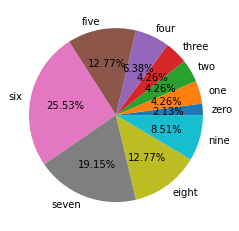

[0, 1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9]


In [34]:
frequency = [0,0,0,0,0,0,0,0,0,0]
labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

for i in dataset:
    if i == 1:
        frequency[1]+=1
    elif i==2:
        frequency[2]+=1
    elif i == 3:
        frequency[3]+=1
    elif i ==4:
        frequency[4] +=1
    elif i ==5:
        frequency[5]+=1
    elif i == 6:
        frequency[6]+=1
    elif i == 7:
        frequency[7] +=1
    elif i ==8:
        frequency[8] +=1
    elif i ==9:
        frequency[9]+=1
    else:
        frequency[0]+=1


import matplotlib.pyplot as plt
import numpy as np

y = np.array(frequency)

plt.pie(y, labels = labels, autopct='%1.2f%%')
plt.show() 

print(dataset)

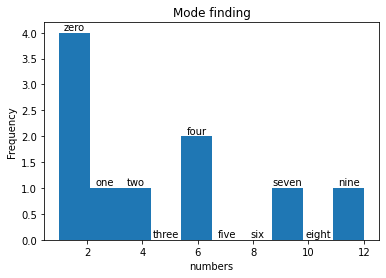

In [31]:

from matplotlib import pyplot as plt
import numpy as np
  
# Creating dataset
numbers = np.array(frequency)
  
# Creating histogram
fig, ax = plt.subplots(1, 1)
ax.hist(numbers)
  
# Set title
ax.set_title("Mode finding")
  
# adding labels
ax.set_xlabel('numbers')
ax.set_ylabel('Frequency')
  
# Make some labels.
rects = ax.patches

  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom')
  
# Show plot
plt.show()